In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LearningAlgorithms import ClassificationAlgorithms
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
%matplotlib inline

In [ ]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [ ]:
df = pd.read_pickle("../../data/interim/03_data_features.pkl")

In [ ]:
df

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,0.909033,-0.168556,-0.172350,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,0.860474,-0.059254,-0.024777,-2.040040,-1.316930,1.986210,B,bench,heavy,30,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,0.997048,-0.033869,-0.063378,1.164754,-1.844231,-1.240332,B,bench,heavy,30,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,0.971809,-0.038011,-0.044993,2.469483,-3.482648,3.563210,B,bench,heavy,30,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,0.911220,-0.056463,-0.046925,8.471911,4.745072,-8.708681,B,bench,heavy,30,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,-0.952114,0.107673,0.063910,-38.792016,8.810964,14.997831,E,row,medium,90,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-1.193314,-0.109309,-0.024266,-2.783290,-1.783932,6.232364,E,row,medium,90,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,90,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


In [ ]:
df_train = df.drop(["participant", "category", "set"], axis=1)

In [ ]:
X = df_train.drop("label", axis=1)
y = df_train["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [ ]:
X_train

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,pca_1,pca_2,pca_3,acc_r,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-19 17:33:16.800,-0.729516,0.153875,0.044966,23.502193,-5.701669,-1.391100,0.274760,0.002245,-0.033941,0.746923,...,0.235926,289.174251,4.216748,0.459880,-36.582396,27.810967,-26.029368,29.108091,6.909835,3
2019-01-15 19:37:28.400,-0.964470,0.014144,0.046367,-27.106342,-5.041411,4.002810,0.350313,-0.086902,-0.047942,0.965688,...,0.532634,361.957413,65.850103,37.028618,58.620688,-39.163308,44.509841,52.721940,18.883458,0
2019-01-19 17:22:51.400,0.791169,0.449213,0.375352,6.805169,-5.046822,-1.962352,-0.207909,0.285290,0.116582,0.984190,...,0.611030,901.195192,-298.637483,-119.655077,45.670440,-170.740871,120.730945,15.463022,-5.064938,2
2019-01-11 16:24:45.400,-1.233542,-0.057986,0.044367,2.677950,-3.070809,3.796401,0.440726,-0.138933,-0.026633,1.235701,...,0.225092,298.993951,27.898708,6.545861,-2.708297,-55.463493,-9.581349,16.653542,1.415527,0
2019-01-20 17:31:03.400,-1.040965,-0.080392,-0.058843,1.006786,-1.945943,-0.246155,0.365539,-0.163365,-0.059405,1.045722,...,0.195813,233.341346,-7.248864,17.846796,-30.463345,22.832008,-8.905082,-3.851608,5.403792,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-14 13:55:50.000,0.758751,-0.251384,-0.227150,15.611756,0.933445,-22.659287,-0.266468,-0.230753,0.006185,0.830959,...,0.224031,363.426765,-12.387342,5.926513,4.281299,-82.725859,-1.229007,-12.009124,-11.774500,1
2019-01-15 14:06:54.200,-1.308910,0.045379,0.071402,26.814708,-8.389035,-12.571056,0.471914,-0.076742,-0.023744,1.311641,...,0.384841,301.123482,-10.662612,25.180426,7.276901,78.624759,-31.003564,-9.769925,-25.532918,0
2019-01-11 16:24:34.200,-0.903080,0.321965,-0.047626,-39.730589,2.114324,-11.411065,0.328736,0.079152,-0.163296,0.959939,...,0.437999,327.228982,68.740411,6.995489,65.598117,41.994127,-19.256168,-12.848075,-8.354428,3


In [ ]:
X_test

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,pca_1,pca_2,pca_3,acc_r,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-14 13:27:05.000,0.624779,-0.391580,-0.091875,24.444167,-7.239013,-5.602389,-0.212448,-0.294041,0.096302,0.743051,...,0.300892,248.993238,38.683457,-8.791374,15.767705,-6.598377,-30.362690,-25.955082,15.011182,1
2019-01-14 13:57:35.600,0.914233,0.112817,-0.132043,-3.014059,-3.074463,-8.699491,-0.302523,0.004351,-0.038217,0.930583,...,0.271053,488.390952,-84.621273,57.916894,-5.486366,-53.217817,11.565810,-1.201181,-11.962877,1
2019-01-11 16:24:37.800,-1.095219,-0.050170,0.044199,-13.073737,-6.193956,-6.747921,0.393409,-0.129597,-0.030751,1.097258,...,0.498716,308.397364,-54.330536,14.797605,-76.404546,52.158661,8.623199,-19.524339,6.970028,0
2019-01-19 17:22:53.000,-0.274413,0.006872,0.918433,-8.058827,1.524559,2.551798,0.190988,0.084796,0.398393,0.958577,...,0.361846,898.033720,-102.182213,-153.336485,155.520840,8.674640,-80.126307,-18.693230,-1.629087,4
2019-01-15 19:12:12.400,0.621699,0.630050,0.368736,4.421008,-3.746559,0.768355,-0.146223,0.384141,0.062496,0.958873,...,0.315403,174.258769,-31.532909,19.542248,-7.798360,25.215105,2.024531,2.354893,3.229668,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-12 16:24:28.000,-0.730845,0.279724,-0.013276,26.103376,3.793862,6.579983,0.273402,0.065918,-0.087763,0.782660,...,0.416993,216.765255,11.603054,32.007701,-62.097947,-13.729325,-9.359292,0.255980,5.969099,3
2019-01-14 13:57:33.600,0.971798,0.325855,-0.021588,-1.798892,-3.079120,16.709695,-0.307227,0.150295,-0.034741,1.025202,...,0.357156,549.701933,78.527625,17.220846,-58.084145,58.346186,63.411059,47.895721,40.398174,2
2019-01-15 19:04:13.800,0.563132,0.602616,0.278978,-7.987382,-1.018759,1.980630,-0.135005,0.350595,0.016536,0.870686,...,0.636639,125.520013,-37.324097,35.802564,-21.544519,4.847998,4.235189,-0.397030,-2.846759,2


In [ ]:
y_train

epoch (ms)
2019-01-19 17:33:16.800     row
2019-01-15 19:37:28.400    dead
2019-01-19 17:22:51.400    rest
2019-01-11 16:24:45.400    dead
2019-01-20 17:31:03.400     row
                           ... 
2019-01-14 13:55:50.000     ohp
2019-01-15 14:06:54.200     row
2019-01-11 16:24:34.200    dead
2019-01-15 19:32:46.800    dead
2019-01-16 19:26:34.400    dead
Name: label, Length: 2901, dtype: object

In [ ]:
y_test

epoch (ms)
2019-01-14 13:27:05.000    bench
2019-01-14 13:57:35.600      ohp
2019-01-11 16:24:37.800     dead
2019-01-19 17:22:53.000     rest
2019-01-15 19:12:12.400    squat
                           ...  
2019-01-12 16:24:28.000     dead
2019-01-14 13:57:33.600      ohp
2019-01-15 19:04:13.800    squat
2019-01-11 16:19:48.200    squat
2019-01-15 19:30:53.600     dead
Name: label, Length: 967, dtype: object

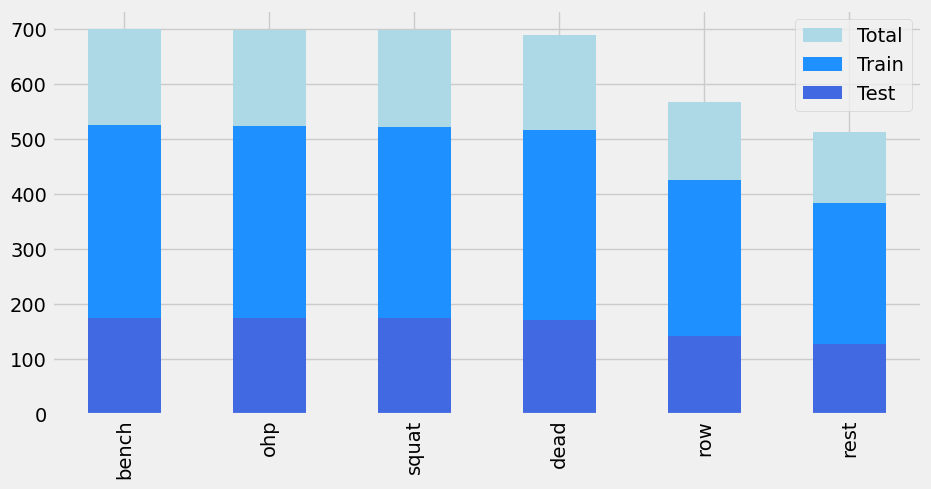

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(
    kind="bar", ax=ax, color="lightblue", label="Total"
)
y_train.value_counts().plot(
    kind="bar", ax=ax, color="dodgerblue", label="Train"
)
y_test.value_counts().plot(
    kind="bar", ax=ax, color="royalblue", label="Test"
)
plt.legend()
plt.show()

In [ ]:
[f for f in df_train.columns if "_temp_" in f]

['acc_y_temp_mean_ws_5',
 'acc_y_temp_std_ws_5',
 'acc_z_temp_mean_ws_5',
 'acc_z_temp_std_ws_5',
 'acc_x_temp_mean_ws_5',
 'acc_x_temp_std_ws_5',
 'gyr_x_temp_mean_ws_5',
 'gyr_x_temp_std_ws_5',
 'gyr_y_temp_mean_ws_5',
 'gyr_y_temp_std_ws_5',
 'gyr_z_temp_mean_ws_5',
 'gyr_z_temp_std_ws_5',
 'acc_r_temp_mean_ws_5',
 'acc_r_temp_std_ws_5',
 'gyr_r_temp_mean_ws_5',
 'gyr_r_temp_std_ws_5']

In [ ]:
time_features = [f for f in df_train.columns if "_temp_" in f]

In [ ]:
time_features

['acc_y_temp_mean_ws_5',
 'acc_y_temp_std_ws_5',
 'acc_z_temp_mean_ws_5',
 'acc_z_temp_std_ws_5',
 'acc_x_temp_mean_ws_5',
 'acc_x_temp_std_ws_5',
 'gyr_x_temp_mean_ws_5',
 'gyr_x_temp_std_ws_5',
 'gyr_y_temp_mean_ws_5',
 'gyr_y_temp_std_ws_5',
 'gyr_z_temp_mean_ws_5',
 'gyr_z_temp_std_ws_5',
 'acc_r_temp_mean_ws_5',
 'acc_r_temp_std_ws_5',
 'gyr_r_temp_mean_ws_5',
 'gyr_r_temp_std_ws_5']

In [ ]:
basic_features = ["acc_x", "acc_y", "acc_z", "gyr_x", "gyr_y", "gyr_z"]
sqaure_features = ["acc_r", "gyr_r"]
pca_features = ["pca_1", "pca_2", "pca_3"]

In [ ]:
[f for f in df_train.columns if "_freq_" in f]

['acc_y_freq_weighted',
 'acc_y_freq_0.0_Hz_ws_14',
 'acc_y_freq_0.357_Hz_ws_14',
 'acc_y_freq_0.714_Hz_ws_14',
 'acc_y_freq_1.071_Hz_ws_14',
 'acc_y_freq_1.429_Hz_ws_14',
 'acc_y_freq_1.786_Hz_ws_14',
 'acc_y_freq_2.143_Hz_ws_14',
 'acc_y_freq_2.5_Hz_ws_14',
 'acc_z_freq_weighted',
 'acc_z_freq_0.0_Hz_ws_14',
 'acc_z_freq_0.357_Hz_ws_14',
 'acc_z_freq_0.714_Hz_ws_14',
 'acc_z_freq_1.071_Hz_ws_14',
 'acc_z_freq_1.429_Hz_ws_14',
 'acc_z_freq_1.786_Hz_ws_14',
 'acc_z_freq_2.143_Hz_ws_14',
 'acc_z_freq_2.5_Hz_ws_14',
 'acc_x_freq_weighted',
 'acc_x_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.357_Hz_ws_14',
 'acc_x_freq_0.714_Hz_ws_14',
 'acc_x_freq_1.071_Hz_ws_14',
 'acc_x_freq_1.429_Hz_ws_14',
 'acc_x_freq_1.786_Hz_ws_14',
 'acc_x_freq_2.143_Hz_ws_14',
 'acc_x_freq_2.5_Hz_ws_14',
 'gyr_x_freq_weighted',
 'gyr_x_freq_0.0_Hz_ws_14',
 'gyr_x_freq_0.357_Hz_ws_14',
 'gyr_x_freq_0.714_Hz_ws_14',
 'gyr_x_freq_1.071_Hz_ws_14',
 'gyr_x_freq_1.429_Hz_ws_14',
 'gyr_x_freq_1.786_Hz_ws_14',
 'gyr_x_freq_2.143

In [ ]:
[f for f in df_train.columns if ("_freq_" in f) or ("_pse" in f)]

['acc_y_freq_weighted',
 'acc_y_pse',
 'acc_y_freq_0.0_Hz_ws_14',
 'acc_y_freq_0.357_Hz_ws_14',
 'acc_y_freq_0.714_Hz_ws_14',
 'acc_y_freq_1.071_Hz_ws_14',
 'acc_y_freq_1.429_Hz_ws_14',
 'acc_y_freq_1.786_Hz_ws_14',
 'acc_y_freq_2.143_Hz_ws_14',
 'acc_y_freq_2.5_Hz_ws_14',
 'acc_z_freq_weighted',
 'acc_z_pse',
 'acc_z_freq_0.0_Hz_ws_14',
 'acc_z_freq_0.357_Hz_ws_14',
 'acc_z_freq_0.714_Hz_ws_14',
 'acc_z_freq_1.071_Hz_ws_14',
 'acc_z_freq_1.429_Hz_ws_14',
 'acc_z_freq_1.786_Hz_ws_14',
 'acc_z_freq_2.143_Hz_ws_14',
 'acc_z_freq_2.5_Hz_ws_14',
 'acc_x_freq_weighted',
 'acc_x_pse',
 'acc_x_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.357_Hz_ws_14',
 'acc_x_freq_0.714_Hz_ws_14',
 'acc_x_freq_1.071_Hz_ws_14',
 'acc_x_freq_1.429_Hz_ws_14',
 'acc_x_freq_1.786_Hz_ws_14',
 'acc_x_freq_2.143_Hz_ws_14',
 'acc_x_freq_2.5_Hz_ws_14',
 'gyr_x_freq_weighted',
 'gyr_x_pse',
 'gyr_x_freq_0.0_Hz_ws_14',
 'gyr_x_freq_0.357_Hz_ws_14',
 'gyr_x_freq_0.714_Hz_ws_14',
 'gyr_x_freq_1.071_Hz_ws_14',
 'gyr_x_freq_1.429_Hz_

In [ ]:
basic_features = ["acc_x", "acc_y", "acc_z", "gyr_x", "gyr_y", "gyr_z"]
square_features = ["acc_r", "gyr_r"]
pca_features = ["pca_1", "pca_2", "pca_3"]
time_features = [f for f in df_train.columns if "_temp_" in f]
freq_features = [f for f in df_train.columns if ("_freq_" in f) or ("_pse" in f)]
cluster_features = ["cluster"]

In [ ]:
print("Basic features:", len(basic_features))
print("Squared features:", len(square_features))
print("PCA features:", len(pca_features))
print("Time features:", len(time_features))
print("Frequency features:", len(freq_features))
print("Cluster features:", len(cluster_features))

Basic features: 6
Squared features: 2
PCA features: 3
Time features: 16
Frequency features: 80
Cluster features: 1


In [ ]:
freq_features = [f for f in df_train.columns if ("_freq" in f) or ("_pse" in f)]

In [ ]:
print("Basic features:", len(basic_features))
print("Squared features:", len(square_features))
print("PCA features:", len(pca_features))
print("Time features:", len(time_features))
print("Frequency features:", len(freq_features))
print("Cluster features:", len(cluster_features))

Basic features: 6
Squared features: 2
PCA features: 3
Time features: 16
Frequency features: 88
Cluster features: 1


In [ ]:
list(set(basic_features))

['gyr_x', 'gyr_z', 'acc_y', 'acc_x', 'gyr_y', 'acc_z']

In [ ]:
list(set(basic_features + square_features + pca_features))

['gyr_x',
 'pca_3',
 'gyr_z',
 'pca_1',
 'acc_y',
 'acc_r',
 'acc_x',
 'pca_2',
 'gyr_y',
 'acc_z',
 'gyr_r']

In [ ]:
feature_set_1 = list(set(basic_features))

In [ ]:
feature_set_2 = list(set(basic_features + square_features + pca_features))

In [ ]:
list(set(feature_set_2 + time_features))

['gyr_r_temp_mean_ws_5',
 'acc_z_temp_std_ws_5',
 'gyr_x',
 'gyr_z',
 'acc_z_temp_mean_ws_5',
 'gyr_y_temp_mean_ws_5',
 'acc_x_temp_std_ws_5',
 'gyr_r_temp_std_ws_5',
 'acc_y_temp_mean_ws_5',
 'acc_y',
 'gyr_x_temp_std_ws_5',
 'acc_x_temp_mean_ws_5',
 'gyr_x_temp_mean_ws_5',
 'gyr_y',
 'acc_y_temp_std_ws_5',
 'acc_z',
 'pca_3',
 'pca_1',
 'pca_2',
 'gyr_z_temp_mean_ws_5',
 'gyr_y_temp_std_ws_5',
 'gyr_r',
 'gyr_z_temp_std_ws_5',
 'acc_r',
 'acc_x',
 'acc_r_temp_mean_ws_5',
 'acc_r_temp_std_ws_5']

In [ ]:
feature_set_3 = list(set(feature_set_2 + time_features))

In [ ]:
list(set(feature_set_3 + freq_features + cluster_features))

['gyr_x',
 'acc_y_freq_0.357_Hz_ws_14',
 'acc_z_freq_1.429_Hz_ws_14',
 'gyr_y_freq_1.786_Hz_ws_14',
 'acc_x_freq_weighted',
 'acc_z_temp_mean_ws_5',
 'gyr_r_freq_0.0_Hz_ws_14',
 'gyr_y_temp_mean_ws_5',
 'acc_x_temp_std_ws_5',
 'acc_z_freq_0.357_Hz_ws_14',
 'acc_x_freq_0.714_Hz_ws_14',
 'acc_r_freq_1.429_Hz_ws_14',
 'acc_r_max_freq',
 'gyr_x_freq_0.357_Hz_ws_14',
 'acc_z',
 'gyr_y_freq_0.0_Hz_ws_14',
 'gyr_z_freq_1.786_Hz_ws_14',
 'gyr_r_freq_1.429_Hz_ws_14',
 'acc_y_freq_1.429_Hz_ws_14',
 'gyr_x_freq_0.0_Hz_ws_14',
 'acc_z_freq_0.0_Hz_ws_14',
 'gyr_z_max_freq',
 'acc_x_pse',
 'gyr_x_freq_1.429_Hz_ws_14',
 'acc_x_max_freq',
 'gyr_y_freq_2.5_Hz_ws_14',
 'acc_x_freq_1.786_Hz_ws_14',
 'gyr_r_temp_mean_ws_5',
 'acc_z_temp_std_ws_5',
 'acc_y_freq_0.0_Hz_ws_14',
 'gyr_z',
 'gyr_r_freq_2.5_Hz_ws_14',
 'acc_y_freq_2.5_Hz_ws_14',
 'gyr_x_freq_1.071_Hz_ws_14',
 'gyr_y_freq_1.071_Hz_ws_14',
 'acc_z_max_freq',
 'gyr_x_temp_std_ws_5',
 'acc_x_temp_mean_ws_5',
 'gyr_x_max_freq',
 'gyr_r_freq_0.357_Hz

In [ ]:
feature_set_4 = list(set(feature_set_3 + freq_features + cluster_features))

In [ ]:
learner = ClassificationAlgorithms()

In [ ]:
max_features = 10

In [ ]:
selected_features, ordered_features, ordered_scores = learner.forward_selection(
    max_features, X_train, y_train
)

0
1
2
3
4
5
6
7
8
9


In [ ]:
selected_features

['pca_1',
 'acc_z_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.0_Hz_ws_14',
 'gyr_r_freq_0.0_Hz_ws_14',
 'acc_z_temp_mean_ws_5',
 'gyr_y_temp_mean_ws_5',
 'gyr_r_freq_1.071_Hz_ws_14',
 'acc_z_freq_1.429_Hz_ws_14',
 'acc_x_freq_weighted',
 'acc_y_freq_0.357_Hz_ws_14']

In [ ]:
ordered_features

['pca_1',
 'acc_z_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.0_Hz_ws_14',
 'gyr_r_freq_0.0_Hz_ws_14',
 'acc_z_temp_mean_ws_5',
 'gyr_y_temp_mean_ws_5',
 'gyr_r_freq_1.071_Hz_ws_14',
 'acc_z_freq_1.429_Hz_ws_14',
 'acc_x_freq_weighted',
 'acc_y_freq_0.357_Hz_ws_14']

In [ ]:
ordered_scores

[0.8876249569114099,
 0.9644950017235436,
 0.9934505342985177,
 0.9979317476732161,
 0.9989658738366081,
 0.9993105825577387,
 0.9993105825577387,
 0.9993105825577387,
 0.9993105825577387,
 0.9993105825577387]

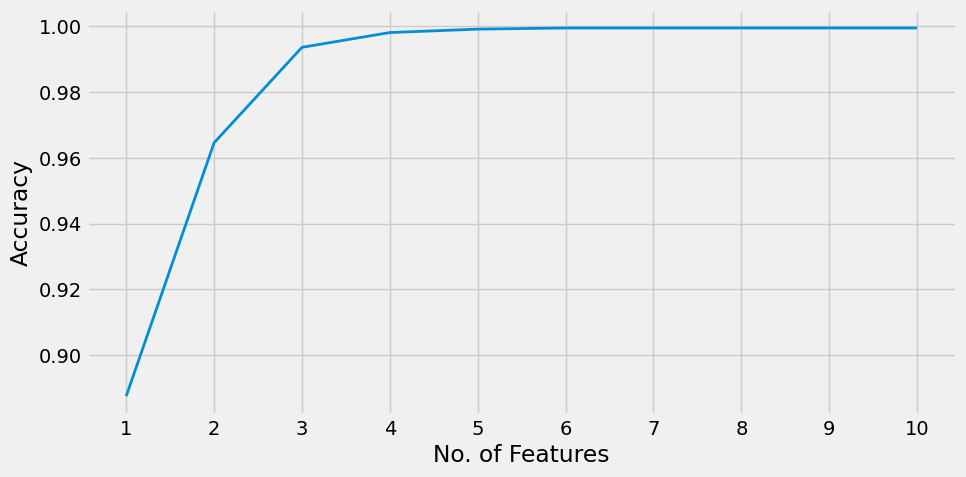

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,max_features+1,1), ordered_scores)
plt.xlabel("No. of Features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1,max_features+1,1))
plt.show()

In [ ]:
# The 1st feature alone is giving around 85% accuracy...

In [ ]:
# Then the 1st TWO features gave 96+% accuracy... and so on

In [ ]:
selected_features = [
    'pca_1',
    'acc_z_freq_0.0_Hz_ws_14',
    'acc_x_freq_0.0_Hz_ws_14',
    'gyr_r_freq_0.0_Hz_ws_14',
    'acc_z_temp_mean_ws_5',
    'gyr_y_temp_mean_ws_5',
    'gyr_r_freq_1.071_Hz_ws_14',
    'acc_z_freq_1.429_Hz_ws_14',
    'acc_x_freq_weighted',
    'acc_y_freq_0.357_Hz_ws_14'
]

In [ ]:
possible_feature_sets = [
    feature_set_1,
    feature_set_2,
    feature_set_3,
    feature_set_4,
    selected_features
]

In [ ]:
feature_names = [
    "feature_set_1",
    "feature_set_2",
    "feature_set_3",
    "feature_set_4",
    "selected_features"
]

In [ ]:
iterations = 1
score_df = pd.DataFrame()

In [ ]:
for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = X_train[possible_feature_sets[i]]
    selected_test_X = X_test[possible_feature_sets[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


In [ ]:
score_df

,model,feature_set,accuracy
0,NN,feature_set_1,0.933816
1,RF,feature_set_1,0.956567
2,KNN,feature_set_1,0.803516
3,DT,feature_set_1,0.934850
4,NB,feature_set_1,0.854188
0,NN,feature_set_2,0.929679
1,RF,feature_set_2,0.957601
2,KNN,feature_set_2,0.800414
3,DT,feature_set_2,0.936918
4,NB,feature_set_2,0.859359


In [ ]:
score_df.sort_values(by="accuracy", ascending=False)

,model,feature_set,accuracy
1,RF,feature_set_4,0.994829
0,NN,feature_set_4,0.993795
1,RF,selected_features,0.990693
3,DT,selected_features,0.984488
0,NN,feature_set_3,0.984488
3,DT,feature_set_4,0.982420
1,RF,feature_set_3,0.982420
0,NN,selected_features,0.978283
2,KNN,feature_set_4,0.968976
3,DT,feature_set_3,0.960703


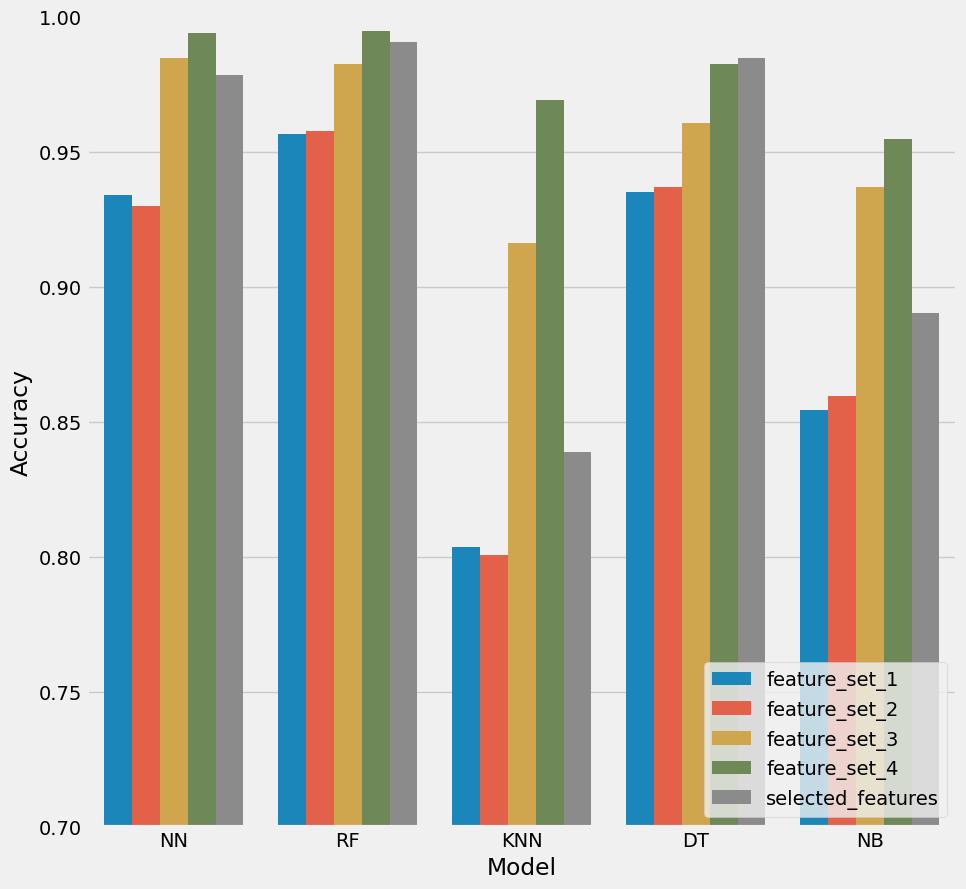

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x="model", y="accuracy", hue="feature_set", data=score_df)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.7,1)
plt.legend(loc="lower right")
plt.show()

In [ ]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.random_forest(
    X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True
)

In [ ]:
accuracy = accuracy_score(y_test, class_test_y)

In [ ]:
accuracy

0.9968976215098242

In [ ]:
class_test_prob_y

,bench,dead,ohp,rest,row,squat
0,0.893333,0.000000,0.056667,0.01,0.020000,0.020000
1,0.283333,0.000000,0.648095,0.04,0.000000,0.028571
2,0.000000,0.980000,0.000000,0.00,0.020000,0.000000
3,0.010000,0.006667,0.013333,0.95,0.020000,0.000000
4,0.000000,0.000000,0.000000,0.00,0.000000,1.000000
...,...,...,...,...,...,...
962,0.000000,0.768333,0.000000,0.02,0.211667,0.000000
963,0.153333,0.020000,0.630000,0.10,0.000000,0.096667
964,0.000000,0.000000,0.000000,0.00,0.000000,1.000000
965,0.000000,0.000000,0.000000,0.00,0.000000,1.000000


In [ ]:
class_test_prob_y.columns

Index(['bench', 'dead', 'ohp', 'rest', 'row', 'squat'], dtype='object')

In [ ]:
classes = class_test_prob_y.columns

In [ ]:
cm = confusion_matrix(y_test, class_test_y, labels=classes)

In [ ]:
cm

array([[174,   0,   1,   0,   0,   0],
       [  0, 172,   0,   0,   0,   0],
       [  0,   0, 175,   0,   0,   0],
       [  0,   0,   0, 128,   0,   0],
       [  0,   2,   0,   0, 140,   0],
       [  0,   0,   0,   0,   0, 175]], dtype=int64)

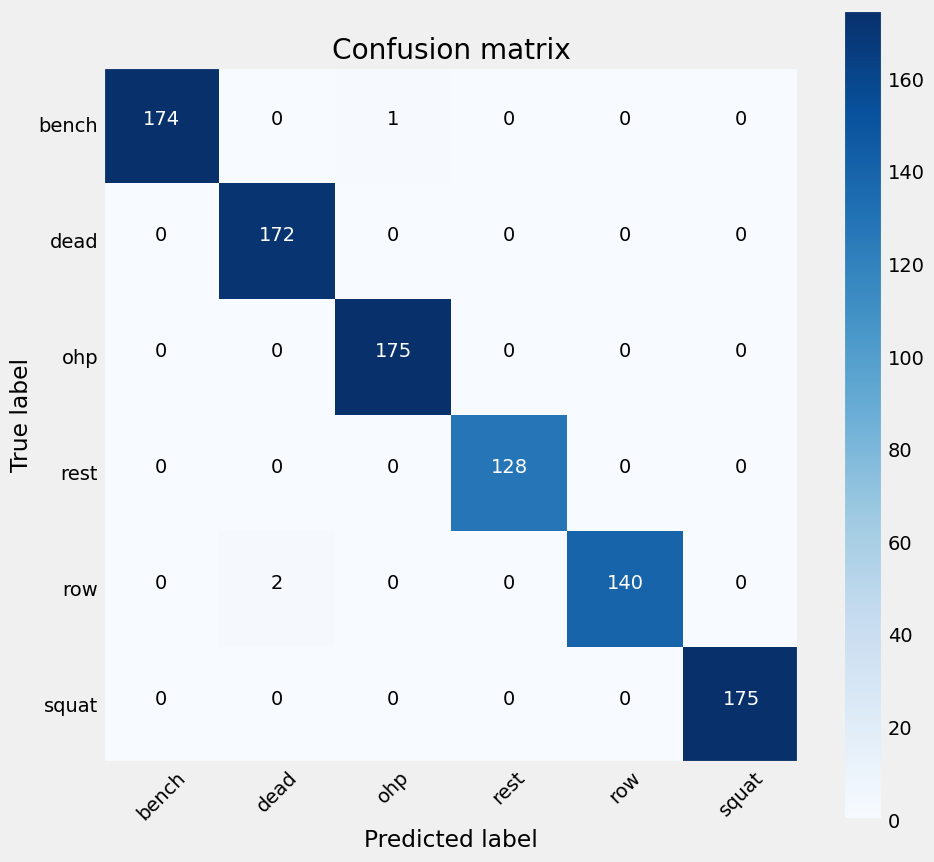

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [ ]:
# The model is very good given that row and deadlift are pretty similar if the accelerometer readings are seen.

In [ ]:
participant_df = df.drop(["set", "category"], axis=1)

In [ ]:
participant_df

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,pca_1,pca_2,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,0.909033,-0.168556,-0.172350,-27.895242,-10.831760,26.285743,B,bench,-0.311963,-0.167364,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,0.860474,-0.059254,-0.024777,-2.040040,-1.316930,1.986210,B,bench,-0.279209,-0.079385,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,0.997048,-0.033869,-0.063378,1.164754,-1.844231,-1.240332,B,bench,-0.328399,-0.066606,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,0.971809,-0.038011,-0.044993,2.469483,-3.482648,3.563210,B,bench,-0.318289,-0.066734,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,0.911220,-0.056463,-0.046925,8.471911,4.745072,-8.708681,B,bench,-0.298084,-0.079820,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,-0.952114,0.107673,0.063910,-38.792016,8.810964,14.997831,E,row,0.349738,-0.028197,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-1.193314,-0.109309,-0.024266,-2.783290,-1.783932,6.232364,E,row,0.419648,-0.179453,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,0.349351,-0.148450,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


In [ ]:
participant_df[participant_df["participant"] != "A"].drop("label", axis=1)

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,pca_1,pca_2,pca_3,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,0.909033,-0.168556,-0.172350,-27.895242,-10.831760,26.285743,B,-0.311963,-0.167364,-0.013911,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,0.860474,-0.059254,-0.024777,-2.040040,-1.316930,1.986210,B,-0.279209,-0.079385,0.045996,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,0.997048,-0.033869,-0.063378,1.164754,-1.844231,-1.240332,B,-0.328399,-0.066606,0.032153,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,0.971809,-0.038011,-0.044993,2.469483,-3.482648,3.563210,B,-0.318289,-0.066734,0.040494,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,0.911220,-0.056463,-0.046925,8.471911,4.745072,-8.708681,B,-0.298084,-0.079820,0.046036,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,-0.952114,0.107673,0.063910,-38.792016,8.810964,14.997831,E,0.349738,-0.028197,-0.069053,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-1.193314,-0.109309,-0.024266,-2.783290,-1.783932,6.232364,E,0.419648,-0.179453,-0.048139,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,0.349351,-0.148450,-0.053031,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


In [ ]:
X_train = participant_df[participant_df["participant"] != "A"].drop("label", axis=1)

In [ ]:
y_train = participant_df[participant_df["participant"] != "A"]["label"]

In [ ]:
y_train

epoch (ms)
2019-01-11 15:08:08.000    bench
2019-01-11 15:08:08.400    bench
2019-01-11 15:08:08.800    bench
2019-01-11 15:08:09.200    bench
2019-01-11 15:08:09.600    bench
                           ...  
2019-01-20 17:33:26.200      row
2019-01-20 17:33:26.600      row
2019-01-20 17:33:27.000      row
2019-01-20 17:33:27.400      row
2019-01-20 17:33:27.800      row
Name: label, Length: 2576, dtype: object

In [ ]:
X_test = participant_df[participant_df["participant"] == "A"].drop("label", axis=1)
y_test = participant_df[participant_df["participant"] == "A"]["label"]

In [ ]:
X_train = X_train.drop(["participant"], axis = 1)
X_test = X_test.drop(["participant"], axis = 1)

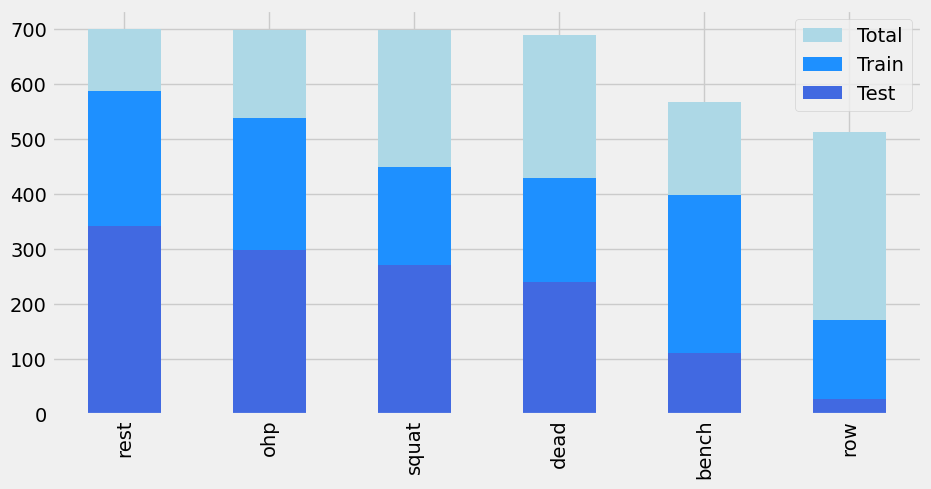

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(
    kind="bar", ax=ax, color="lightblue", label="Total"
)

y_train.value_counts().plot(
    kind="bar", ax=ax, color="dodgerblue", label="Train"
)

y_test.value_counts().plot(
    kind="bar", ax=ax, color="royalblue", label="Test"
)
plt.legend()
plt.show()